In [19]:
import os
os.environ['HANLP_HOME'] = '/dlabscratch1/tdai/hanlp'
import hanlp
import chinese_converter
import random
import re
from tqdm import tqdm
import math
from collections import defaultdict
import hanlp.utils
import pandas as pd
from collections import Counter
from gensim.models import Word2Vec
import pandas as pd
from matplotlib import font_manager
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来正常显示中文标签
plt.rcParams["axes.unicode_minus"] = False  # 用来正常显示负号
print("SimHei" in [f.name for f in font_manager.fontManager.ttflist])  

True


# adjective color analysis

In [2]:
# collect text
book_names = [f.encode('latin1').decode('utf-8') for f in os.listdir('./book')]
text = ""
for book in book_names:
    if "朱天心" in book:
        book = book.encode('utf-8').decode('latin1')
        with open(f'./book/{book}', 'r', encoding='utf-8') as f:
                text_ = f.read()
                text_ = chinese_converter.to_simplified(text_)
                text += text_ + "\n"

In [3]:
# clean the text
text_chunks = text.replace("\u3000", "").split("\n")
text_chunks = [chunk for chunk in text_chunks if chunk.strip()]
text_chunks = [chunk for text_chunk in text_chunks for chunk in hanlp.utils.rules.split_sentence(text_chunk)]
text_chunks = [chunk for chunk in text_chunks if re.search(r'[\u4e00-\u9fff]', chunk)]

In [5]:
HanLP = hanlp.pipeline() \
    .append(hanlp.load('COARSE_ELECTRA_SMALL_ZH'), output_key='tok') \
    .append(hanlp.load('CTB9_POS_ELECTRA_SMALL'), output_key='pos') \
    # .append(hanlp.load('MSRA_NER_ELECTRA_SMALL_ZH'), output_key='ner', input_key='tok') \
    # .append(hanlp.load('CTB9_CON_ELECTRA_SMALL'), output_key='con', input_key='tok')\
    # .append(hanlp.load('CTB9_DEP_ELECTRA_SMALL', conll=0), output_key='dep', input_key='tok')\
    # .append(hanlp.load('CTB9_CON_ELECTRA_SMALL'), output_key='con', input_key='tok')


all_records = []
for text_sample in tqdm(text_chunks):
    # HanLP(text_sample).pretty_print()
    res = HanLP(text_sample)
    all_records.append(res)

100%|██████████| 5317/5317 [02:37<00:00, 33.79it/s]


In [6]:
all_records[2].pretty_print()

In [7]:
# Count tokens with labels 'JJ' or 'VA' and aggregate counts
df_tokens = pd.DataFrame([
    {'word': tok, 'count': 1, 'pos_tag': pos}
    for record in all_records
    for tok, pos in zip(record['tok'], record['pos'])
    if pos in ['JJ', 'VA']
])

# Aggregate counts and filter words with length >= 2
df_tokens = df_tokens.groupby(['word', 'pos_tag'], as_index=False)['count'].sum()
df_tokens_selected = df_tokens[df_tokens['word'].str.len() >= 2].sort_values(by='count', ascending=False)

In [8]:
word2vec = hanlp.load(hanlp.pretrained.word2vec.MERGE_SGNS_BIGRAM_CHAR_300_ZH)

Loading vocab and matrix from cache ...

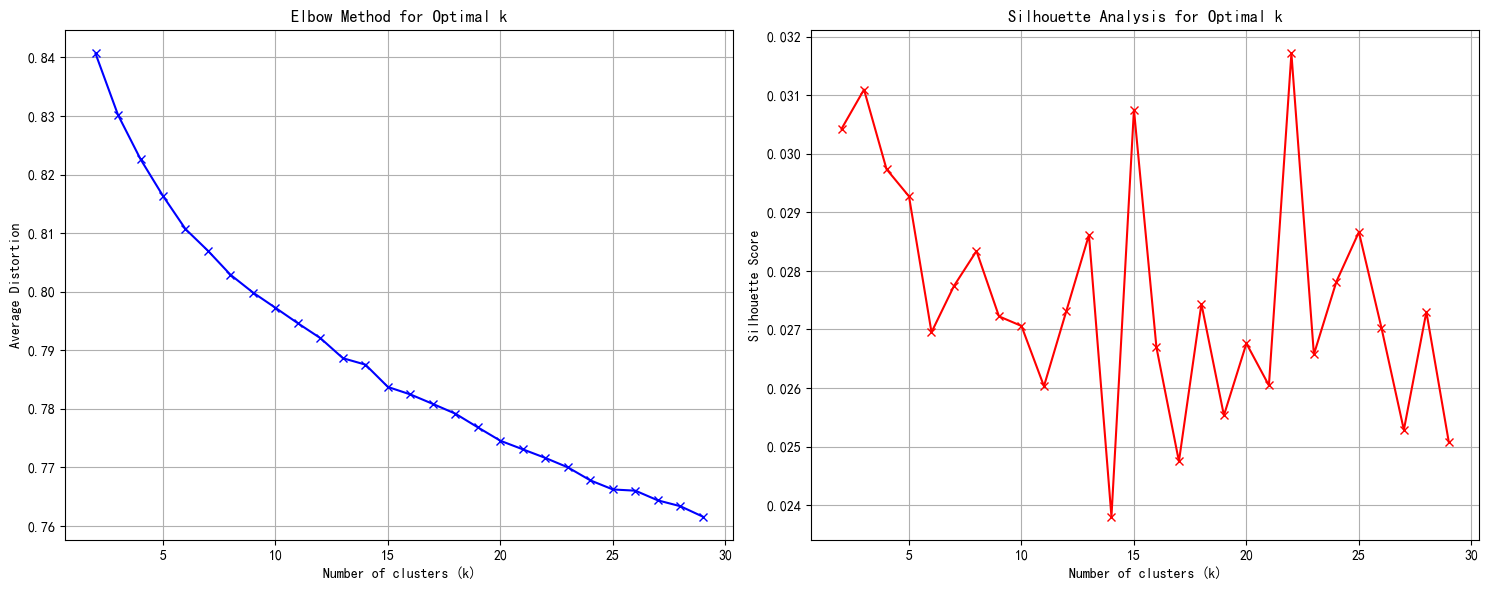


Cluster 1 top words:
1. 丰富
2. 厚实
3. 丰满
4. 富有
5. 丰沛
6. 生动
7. 独特
8. 鲜明
9. 饱满
10. 多样

Cluster 2 top words:
1. 坚毅
2. 倔强
3. 坚贞
4. 刚烈
5. 豁达
6. 勇敢
7. 忠贞
8. 坚强
9. 正直
10. 骄矜

Cluster 3 top words:
1. 舒服
2. 痛快
3. 开心
4. 愉快
5. 畅快
6. 好玩
7. 好吃
8. 愉悦
9. 过瘾
10. 好喝

Cluster 4 top words:
1. 羞愧
2. 沮丧
3. 诧异
4. 懊丧
5. 气愤
6. 惊惶
7. 吃惊
8. 慌张
9. 激动
10. 郁闷

Cluster 5 top words:
1. 宽阔
2. 宽敞
3. 平阔
4. 开阔
5. 平坦
6. 窄小
7. 高阔
8. 阔大
9. 低矮
10. 平旷

Cluster 6 top words:
1. 蛮横
2. 凶暴
3. 无耻
4. 残忍
5. 粗鲁
6. 狡猾
7. 愚蠢
8. 阴险
9. 怯懦
10. 粗野

Cluster 7 top words:
1. 怪异
2. 诡异
3. 怪诞
4. 古怪
5. 奇特
6. 奇怪
7. 玄异
8. 奇异
9. 奇妙
10. 荒诞

Cluster 8 top words:
1. 迷迷蒙蒙
2. 淅淅
3. 绿沉沉
4. 苍茫
5. 凄迷
6. 沉沉
7. 潺潺
8. 莽莽
9. 潋滟
10. 蝉声

Cluster 9 top words:
1. 明媚
2. 迷人
3. 甜美
4. 湛蓝
5. 绮丽
6. 清爽
7. 美丽
8. 清澈
9. 和煦
10. 缤纷

Cluster 10 top words:
1. 寂寥
2. 寂静
3. 死寂
4. 安静
5. 寂静无声
6. 荒凉
7. 空旷
8. 冷清
9. 幽静
10. 寂寞

Cluster 11 top words:
1. 腼腆
2. 顽皮
3. 胆小
4. 调皮
5. 聪明
6. 慧黠
7. 天真
8. 顽劣
9. 英俊
10. 可爱

Cluster 12 top words:
1. 笑眯眯
2. 愣愣
3. 懒懒
4. 冷冷
5. 急急
6. 小声
7. 呆呆
8. 讷讷
9. 轻声
10

In [29]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt

# Function to get word vectors for valid words
def get_valid_word_vectors(words, word2vec_model):
    word_vecs = []
    valid_words = []
    for word in words:
        try:
            vec = word2vec_model(word).cpu().numpy()
            if not np.all(vec == 0):
                word_vecs.append(vec)
                valid_words.append(word)
        except:
            pass
    return np.array(word_vecs), valid_words

# Get word vectors
word_vectors, valid_words = get_valid_word_vectors(df_tokens_selected['word'], word2vec)

# Analyze for optimal k using both elbow method and silhouette score
distortions = []
silhouette_scores = []
K_range = range(2, min(30, len(word_vectors)))

for k in K_range:
    # Elbow method
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(word_vectors)
    distortions.append(sum(np.min(cdist(word_vectors, kmeans.cluster_centers_, 'euclidean'), axis=1)) / word_vectors.shape[0])
    
    # Silhouette score (only calculate if we have enough samples)
    if len(word_vectors) > k:
        score = silhouette_score(word_vectors, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)  # Add placeholder for too few samples

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Plot elbow curve
plt.subplot(1, 2, 1)
plt.plot(K_range, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Distortion')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'rx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.grid(True)

plt.tight_layout()
plt.show()

# Determine optimal k based on both methods
optimal_k = 25  # You can adjust this based on visual inspection of both plots

# Perform k-means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(word_vectors)

# Find words closest to each centroid and save to file
cluster_results = []

for i in range(optimal_k):
    # Get indices of words in this cluster
    cluster_indices = np.where(clusters == i)[0]
    
    # Calculate distances to centroid
    centroid = kmeans.cluster_centers_[i]
    distances = np.linalg.norm(word_vectors[cluster_indices] - centroid, axis=1)
    
    # Sort by distance
    sorted_indices = np.argsort(distances)
    top_indices = sorted_indices[:min(10, len(sorted_indices))]
    cluster_words = [valid_words[cluster_indices[idx]] for idx in top_indices]
    
    # Print top 10 words closest to centroid
    print(f"\nCluster {i+1} top words:")
    for j, word in enumerate(cluster_words, 1):
        print(f"{j}. {word}")
    
    # Store cluster info for saving to file
    cluster_results.append({
        'cluster_id': i+1,
        'words': cluster_words
    })

# Save results to a text file
with open('adjective_clusters.txt', 'w', encoding='utf-8') as f:
    f.write(f"K-means clustering of adjectives with {optimal_k} clusters\n")
    f.write("=" * 50 + "\n\n")
    
    for cluster in cluster_results:
        f.write(f"Cluster {cluster['cluster_id']} top words:\n")
        for i, word in enumerate(cluster['words'], 1):
            f.write(f"{i}. {word}\n")
        f.write("\n")

print(f"\nResults saved to 'adjective_clusters.txt'")

# Create a dictionary mapping words to their cluster IDs
word_to_cluster = {valid_words[i]: clusters[i] + 1 for i in range(len(valid_words))}

# Add cluster_id column to df_tokens_selected
df_tokens_selected['cluster_id'] = df_tokens_selected['word'].map(word_to_cluster)

# Fill missing values (words without vectors or not in valid_words)
df_tokens_selected['cluster_id'] = df_tokens_selected['cluster_id'].fillna(0).astype(int)

# Get the centroids array from kmeans
centroids = kmeans.cluster_centers_

# Function to get the centroid vector for a given cluster_id
def get_centroid(cluster_id):
    if cluster_id == 0:  # Handle words without clusters
        return np.zeros(centroids.shape[1])
    return centroids[cluster_id - 1]  # -1 because cluster_ids start from 1

# Add centroid vectors as a new column
df_tokens_selected['cluster_centroid'] = df_tokens_selected['cluster_id'].apply(get_centroid)

In [ ]:
cluster_id_labels = {
    1: "丰富/厚实",
    2: "坚毅/倔强",
    3: "舒服/痛快",
    4: "羞愧/懊丧",
    5: "宽阔/开阔",
    6: "蛮横/残忍",
    7: "怪异/诡异",
    8: "迷蒙/苍茫",
    9: "明媚/迷人",
    10: "寂寥/幽静",
    11: "腼腆/调皮",
    12: "笑眯眯/懒懒",
    13: "诚恳/善良",
    14: "红扑扑/软软",
    15: "庸俗/粗俗",
    16: "清晰/真切",
    17: "可笑/可悲",
    18: "迷惘/孤独",
    19: "典雅/优雅",
    20: "悠远/深沉",
    21: "阴冷/寒冷",
    22: "悲伤/忧伤",
    23: "穷困/贫乏",
    24: "纯熟/精妙",
    25: "柔柔顺顺/香香"
}

In [33]:
df_tokens_selected['cluster_label'] = df_tokens_selected['cluster_id'].map(cluster_id_labels)
df_tokens_selected.dropna(subset=['cluster_label'], inplace=True)
df_tokens_selected.drop_duplicates(subset=['word'], inplace=True)
df_tokens_selected.to_csv('zhutianxin_adjectives.csv', index=False, encoding='utf-8-sig')
df_tokens_selected

,word,pos_tag,count,cluster_id,cluster_label,cluster_centroid
655,奇怪,VA,47,7,怪异/诡异,"[-0.004024813, -0.038955875, -0.009698661, -0...."
471,可怕,VA,34,17,可笑/可悲,"[0.028755039, -0.020859145, -0.04145981, -0.04..."
1475,漂亮,VA,33,19,典雅/优雅,"[0.0075717103, -0.04146883, 0.017863065, -0.05..."
837,年轻,VA,30,11,腼腆/调皮,"[0.028016012, -0.022622604, 0.0021668149, -0.0..."
1429,清楚,VA,28,16,清晰/真切,"[0.018599425, -0.039097276, -0.020887151, -0.0..."
...,...,...,...,...,...,...
1006,慈祥,VA,1,13,诚恳/善良,"[0.059668157, -0.007704694, -0.010241198, -0.0..."
1005,慈悲,JJ,1,13,诚恳/善良,"[0.059668157, -0.007704694, -0.010241198, -0.0..."
1004,愤怒,VA,1,4,羞愧/懊丧,"[0.024143588, -0.04379445, -0.0026986736, -0.0..."
1003,愣愣,VA,1,12,笑眯眯/懒懒,"[0.018136822, -0.017303621, -0.014571938, -0.0..."


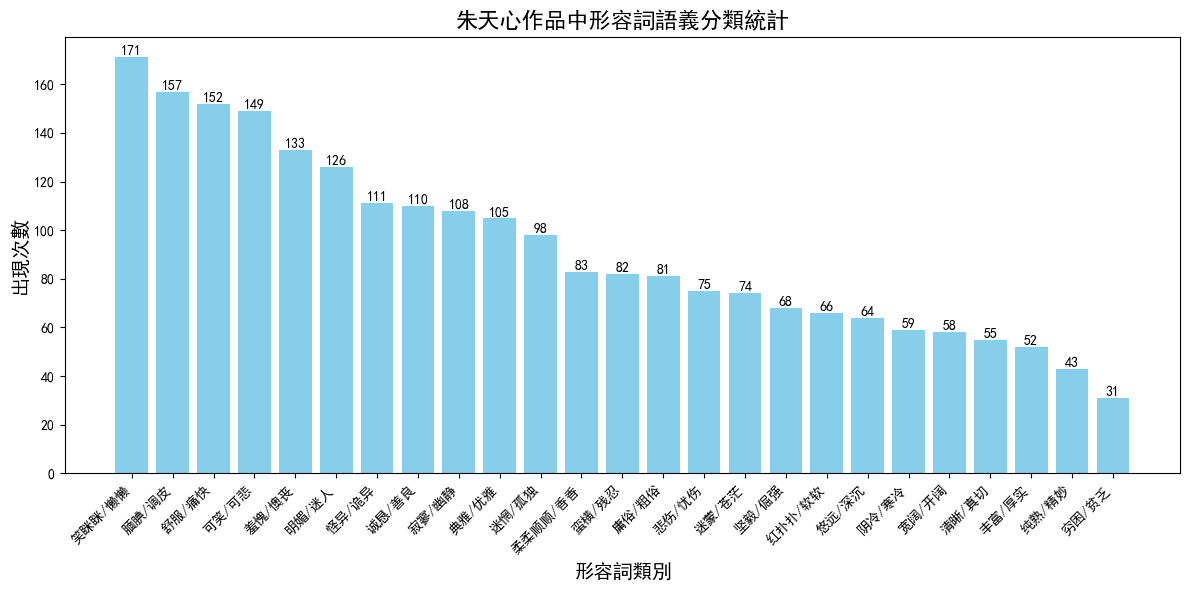

In [32]:
import matplotlib.pyplot as plt

# Group by cluster_label and sum the counts
cluster_counts = df_tokens_selected.groupby('cluster_label')['count'].sum().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}',
            ha='center', va='bottom')

plt.title('朱天心作品中形容詞語義分類統計', fontsize=16)
plt.xlabel('形容詞類別', fontsize=14)
plt.ylabel('出現次數', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# verb analysis with dependency parsing

In [141]:
MALE_SEED = ['哥', '弟', '父', '爸', '爷', '伯', '叔', '舅', '公', '男', '郎', '兄']
FEMALE_SEED = ['姐', '妹', '母', '妈', '奶', '婆', '嬷', '女', '娘',  '姨', '嫂', '姊']

MALE_WORDS = ["他", "他们", "男士", "男孩", "男子", "男性", "先生", "男人", "爸爸", "父亲", "姥爷", "儿子", "男友",\
    "叔叔", "哥哥", "弟弟", "爷爷", "外公", "公公", "舅舅", "伯伯", "大哥", "小弟", "男神", "男生",\
    "阿公", "爸比", "父親", "祖父", "外祖父", "堂哥", "堂弟", "表哥", "表弟", '大哥', '阿公', '兄弟']
FEMALE_WORDS = ["她", "她们", "女士", "女孩", "女子", "女性", "小姐", "女人", "妈妈", "母亲", "姥姥", "女儿", "女友",\
    "阿姨", "姐姐", "妹妹", "奶奶", "外婆", "婆婆", "舅妈", "大姐", "小妹", "女神", "女生",\
    "阿嬷", "妈咪", "母親", "祖母", "外祖母", "堂姐", "堂妹", "表姐", "表妹", '小姐', '太太', '阿姨', '姊妹']

In [142]:
# collect text
book_names = [f.encode('latin1').decode('utf-8') for f in os.listdir('./book')]
text = ""
for book in book_names:
    if "朱天心" in book:
        book = book.encode('utf-8').decode('latin1')
        with open(f'./book/{book}', 'r', encoding='utf-8') as f:
                text_ = f.read()
                text_ = chinese_converter.to_simplified(text_)
                text += text_ + "\n"

In [143]:
# clean the text
text_chunks = text.replace("\u3000", "").split("\n")
text_chunks = [chunk for chunk in text_chunks if chunk.strip()]
text_chunks = [chunk for text_chunk in text_chunks for chunk in hanlp.utils.rules.split_sentence(text_chunk)]
text_chunks = [chunk for chunk in text_chunks if re.search(r'[\u4e00-\u9fff]', chunk)]

ways of finding person entities (pronoun, person name, etc.) for better dependency parsing analysis (still exploring)

In [6]:
# explan gender words
male_counter = Counter()
female_counter = Counter()

pattern = re.compile(r"[一-龥]{1,4}")

words = pattern.findall("。".join(text_chunks))

for word in words:
    if any(p in word for p in MALE_SEED):
        male_counter[word] += 1
    if any(p in word for p in FEMALE_SEED):
        female_counter[word] += 1

# 获取频率较高的称谓词
top_male = [w for w, c in male_counter.most_common(50) if len(w) <= 3]
top_female = [w for w, c in female_counter.most_common(50) if len(w) <= 3]

print(top_male)
print(top_female)

['男孩', '爷爷说', '哥', '爸爸', '男人', '公园', '爸', '男孩子', '个男孩', '哥哥', '教父', '舅妈', '父亲', '公园号', '父', '国父', '天父', '伯', '外公', '公室', '男友', '少爷', '我舅妈', '男子', '阿义哥', '弟', '父字']
['女孩', '妈妈', '母', '妹妹', '的女孩', '女', '婆', '的女人', '舅妈', '妈', '妹', '母亲', '女人', '姊姊', '姊', '的女儿', '我舅妈', '我老婆', '小姐', '妹们', '是女', '妹妹说']


In [151]:
# expand using information from constituents and NER
HanLP = hanlp.pipeline() \
    .append(hanlp.load('COARSE_ELECTRA_SMALL_ZH'), output_key='tok') \
    .append(hanlp.load('CTB9_POS_ELECTRA_SMALL'), output_key='pos') \
    .append(hanlp.load('MSRA_NER_ELECTRA_SMALL_ZH'), output_key='ner', input_key='tok') \
    .append(hanlp.load('CTB9_CON_ELECTRA_SMALL'), output_key='con', input_key='tok')\
    # .append(hanlp.load('CTB9_DEP_ELECTRA_SMALL', conll=0), output_key='dep', input_key='tok')\
    # .append(hanlp.load('CTB9_CON_ELECTRA_SMALL'), output_key='con', input_key='tok')


all_records = []
for text_sample in tqdm(text_chunks):
    if "魏哥哥" in text_sample:
        HanLP(text_sample).pretty_print()
        res = HanLP(text_sample)
        # print(res)
        # print(res['con'])
        break

  0%|          | 0/5317 [00:00<?, ?it/s]     

 81%|████████▏ | 4325/5317 [00:00<00:00, 23211.79it/s]


customize the tokenzier with new words

In [148]:
MALE_WORDS_EXPANDED = [
    '卢伯伯', '男孩子', '外公', '我大舅', '兄弟们', '先生', '男朋友', '教父', 
    '男人', '先生们', '乔和魏哥哥', '我外公'
]

FEMALE_WORDS_EXPANDED = ['我老婆', '孟姊姊', '女孩子', '我外婆', '女孩儿',
                         '女人', '女', '小女', '妈妈', '姊姊', '妹妹', '阿芳嫂', '女学生']

In [149]:
MALE_WORDS = set(MALE_WORDS).union(MALE_WORDS_EXPANDED)
FEMALE_WORDS = set(FEMALE_WORDS).union(FEMALE_WORDS_EXPANDED)
CUSTOMIZED_WORDS = MALE_WORDS.union(FEMALE_WORDS)

tokenzier_name = 'COARSE_ELECTRA_SMALL_ZH'
tokenizer = hanlp.load(tokenzier_name)
tokenizer.dict_force = None
tokenizer.dict_combine = CUSTOMIZED_WORDS

compute idf with the tokenizer

In [150]:
# compute idf
doc_freq = defaultdict(int)
total_docs = len(text_chunks)
for doc in tqdm(text_chunks, desc="Tokenizing documents"):
    tokens = set(tokenizer(doc))  # use a set to count each token once per document
    for token in tokens:
        doc_freq[token] += 1
idf = {token: math.log((total_docs + 1) / (freq + 1)) + 1 for token, freq in doc_freq.items()}
with open('token_idf.txt', 'w', encoding='utf-8') as f:
    for token, score in idf.items():
        f.write(f"{token}\t{score}\n")

Tokenizing documents: 100%|██████████| 5317/5317 [01:19<00:00, 66.64it/s]


perform dependency parsing

In [153]:
HanLP = hanlp.pipeline() \
    .append(tokenizer, output_key='tok') \
    .append(hanlp.load('CTB9_DEP_ELECTRA_SMALL', conll=0), output_key='dep', input_key='tok')\

def extract_verbs(toks, dep):
    records = []
    for i, tok in enumerate(toks):
        if tok in MALE_WORDS:
            records.append((tok, toks[dep[i][0]-1], dep[i][1], 'male'))
        elif tok in FEMALE_WORDS:
            records.append((tok, toks[dep[i][0]-1], dep[i][1], 'female'))
    return records

all_records = []
for text_sample in tqdm(text_chunks, desc="Processing text with HanLP"):
    res = HanLP(text_sample)
    all_records.extend(extract_verbs(res['tok'], res['dep']))

df_gender = pd.DataFrame(all_records, columns=['gender_word', 'verb', 'relation', 'gender'])
df_gender.to_csv('gender_coarse.csv')

Processing text with HanLP: 100%|██████████| 5317/5317 [05:53<00:00, 15.05it/s]


In [ ]:


# df_gender = pd.read_csv('gender_coarse.csv').drop(columns=['Unnamed: 0'])
# idf_df = pd.read_csv('token_idf.txt', sep='\t', header=None, names=['token', 'idf'], encoding='utf-8')
# idf = idf_df.set_index('token')['idf'].to_dict()

True


In [ ]:
def ranking(group):
    verb_counts = group['verb'].value_counts()
    scores = {verb: count * idf.get(verb, 1) for verb, count in verb_counts.items()}
    ranked_verbs = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return pd.DataFrame({'verb_ranked': [verb for verb, score in ranked_verbs],
                        'count': [verb_counts[verb] for verb, score in ranked_verbs],
                        'idf': [idf.get(verb, 1) for verb, score in ranked_verbs]})

df_group = df_gender.groupby(['gender', 'relation']).apply(ranking)

/tmp/ipykernel_2545460/1916594008.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_group = df_gender.groupby(['gender', 'relation']).apply(ranking)


In [165]:
df_group

verb_ranked  count       idf
gender relation                               
female amod     0          同业      4  6.939795
                1          明星      2  7.632942
                2         漫画家      1  8.885705
                3          机车      1  8.885705
                4          同胞      1  8.192558
...                       ...    ...       ...
male   xsubj    4          回答      1  6.534330
                5           拍      1  6.443358
                6          没有      1  4.189781
                7           做      1  4.073521
                8           看      1  3.315454

[2371 rows x 3 columns]

In [168]:
gender_relation_pair = ('male', 'nsubj')
verbs = df_group.loc[gender_relation_pair][df_group.loc[gender_relation_pair].apply(lambda x: len(x['verb_ranked'])>=2, axis=1)]
verbs

,verb_ranked,count,idf
1,告诉,17,5.004142
10,以为,9,4.993885
11,一样,11,4.081684
12,记得,9,4.953880
14,知道,11,3.958452
...,...,...,...
701,想起,1,5.404465
703,奇怪,1,5.274787
705,眼睛,1,5.196826
706,有些,1,5.196826


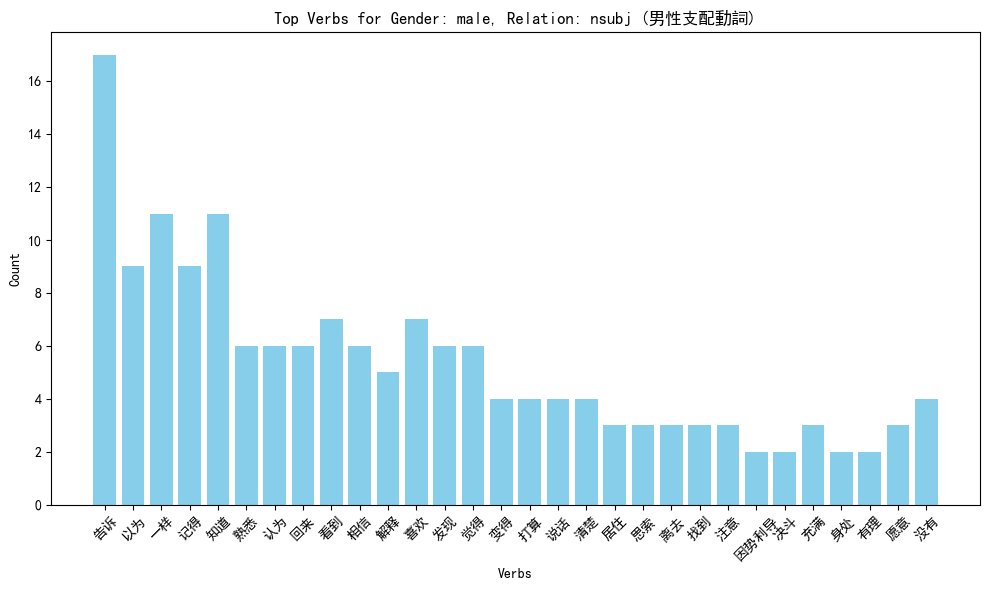

In [171]:
gender_relation_pair = ('male', 'nsubj')
verbs = df_group.loc[gender_relation_pair][df_group.loc[gender_relation_pair].apply(lambda x: len(x['verb_ranked'])>=2, axis=1)].head(30)

plt.figure(figsize=(10, 6))
plt.bar(verbs['verb_ranked'], verbs['count'], color='skyblue')
plt.xlabel('Verbs')
plt.ylabel('Count')
plt.title(f"Top Verbs for Gender: {gender_relation_pair[0]}, Relation: {gender_relation_pair[1]} (男性支配動詞)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

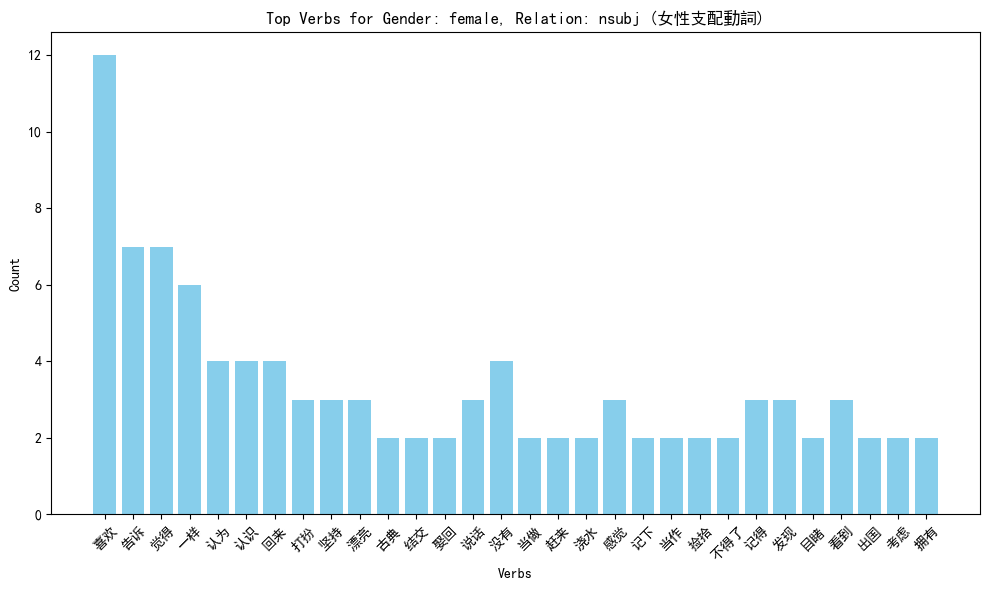

In [172]:
gender_relation_pair = ('female', 'nsubj')
verbs = df_group.loc[gender_relation_pair][df_group.loc[gender_relation_pair].apply(lambda x: len(x['verb_ranked'])>=2, axis=1)].head(30)

plt.figure(figsize=(10, 6))
plt.bar(verbs['verb_ranked'], verbs['count'], color='skyblue')
plt.xlabel('Verbs')
plt.ylabel('Count')
plt.title(f"Top Verbs for Gender: {gender_relation_pair[0]}, Relation: {gender_relation_pair[1]} (女性支配動詞)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

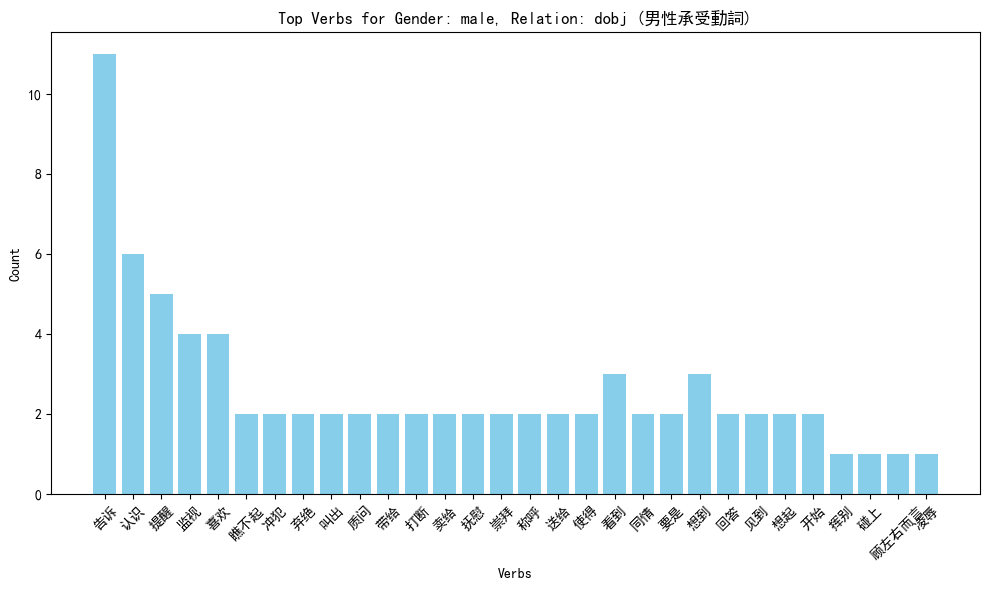

In [174]:
gender_relation_pair = ('male', 'dobj')
verbs = df_group.loc[gender_relation_pair][df_group.loc[gender_relation_pair].apply(lambda x: len(x['verb_ranked'])>=2, axis=1)].head(30)

plt.figure(figsize=(10, 6))
plt.bar(verbs['verb_ranked'], verbs['count'], color='skyblue')
plt.xlabel('Verbs')
plt.ylabel('Count')
plt.title(f"Top Verbs for Gender: {gender_relation_pair[0]}, Relation: {gender_relation_pair[1]} (男性承受動詞)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

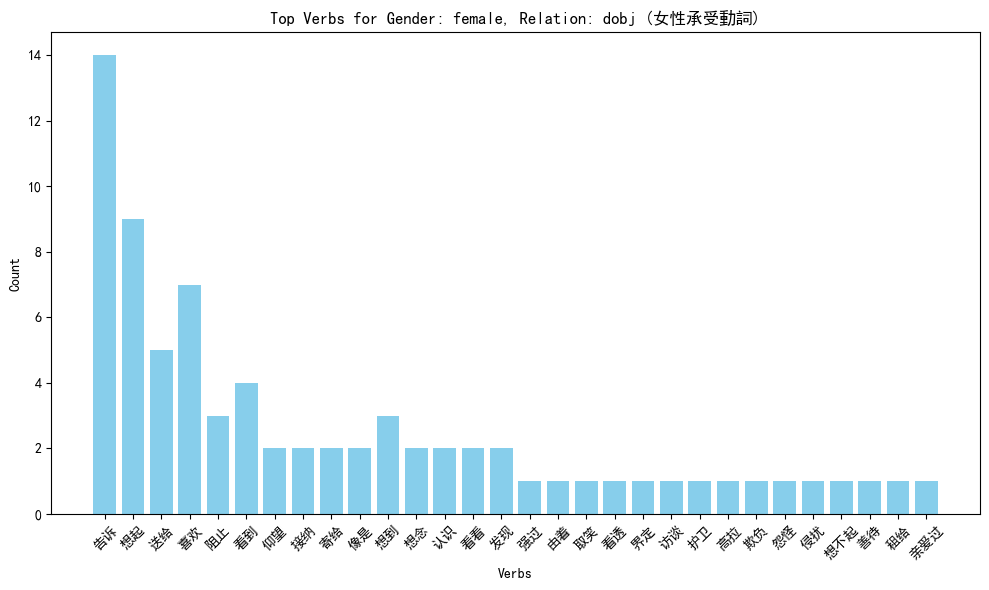

In [173]:
gender_relation_pair = ('female', 'dobj')
verbs = df_group.loc[gender_relation_pair][df_group.loc[gender_relation_pair].apply(lambda x: len(x['verb_ranked'])>=2, axis=1)].head(30)

plt.figure(figsize=(10, 6))
plt.bar(verbs['verb_ranked'], verbs['count'], color='skyblue')
plt.xlabel('Verbs')
plt.ylabel('Count')
plt.title(f"Top Verbs for Gender: {gender_relation_pair[0]}, Relation: {gender_relation_pair[1]} (女性承受動詞)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()